Importing Libraries

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt
import random

Loading Mnist Data

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() ##x== images and y== label
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Showing Images

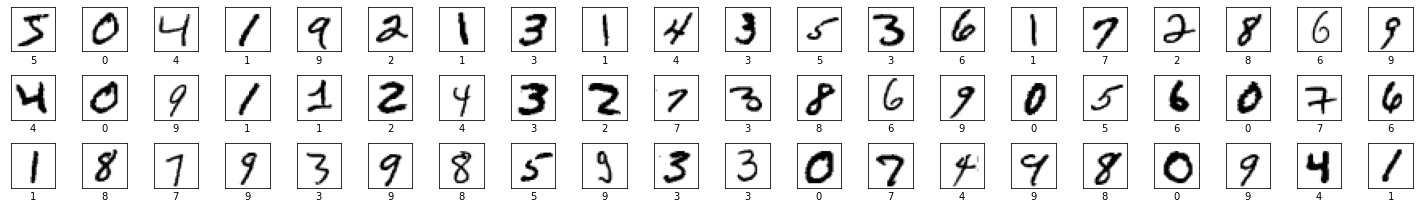

In [29]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

Data Preprocessing

In [30]:
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0

Build The Model

In [31]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])

Model Defination

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

Compile Using Adam Optimizer

In [33]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Compile Using Adam SGD

In [34]:
# model.compile(
#     optimizer='sgd', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

Compile Using Adam RMSPROP

In [35]:
# model.compile(
#     optimizer='rmsprop', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

Train The Model

In [36]:
h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1548 - accuracy: 0.9541 - val_loss: 0.0777 - val_accuracy: 0.9772
Epoch 2/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0452 - val_accuracy: 0.9859
Epoch 3/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0415 - val_accuracy: 0.9882
Epoch 4/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0444 - val_accuracy: 0.9880
Epoch 5/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0333 - val_accuracy: 0.9908


Ploting Training Result

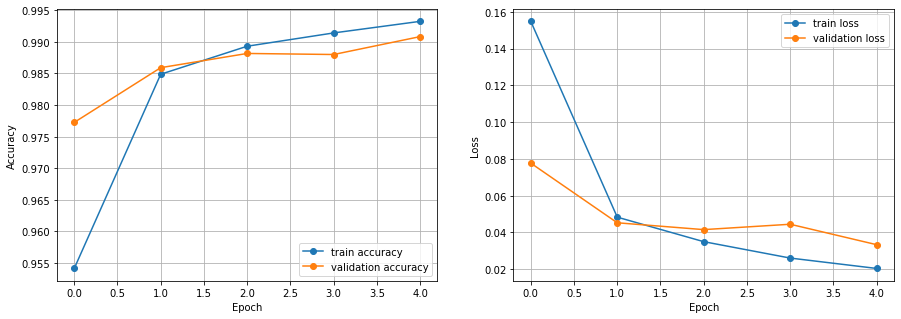

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Evaluating The Model on The Test Dataset

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0338 - accuracy: 0.9891

Test Accuracy: 0.9890999794006348

Test Loss: 0.03384561091661453


Make Predictions on The Entire Test Images

In [39]:
predictions = model.predict(x_test)

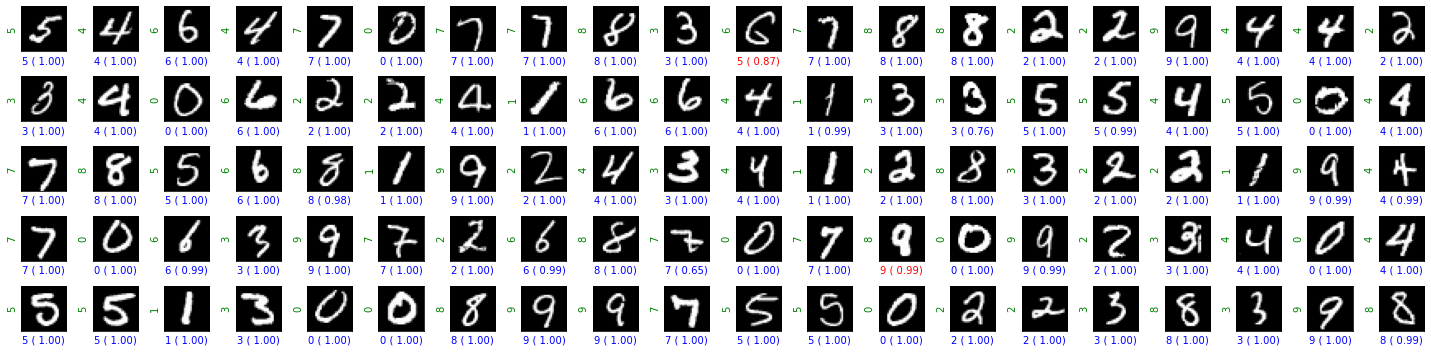

In [41]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()